In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
#import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#A. Problem
# A company waits to improve the click rate of their Ads. They have a subset of users to whom the ads were displayed
# The accuracy has to be at least 75%. Once a model is made, they will run the model to other users who also saw the ads
# They will then increase the frequency of ads to those that were classified as Clicked on Ad

#B. Highlights
# 1. Some algorithms might better represent a dataset than other algorithms
# 2. Reducing features can be as effective method as adding features when improving accuracy
# 3. You can improve accuracy by combining different machine learning methods

df_advertising = pd.read_csv('advertising.csv')
df_advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Population per class:     0
0  500
1  500
Proportion Chance Criterion: 50.00%
1.25 * Proportion Chance Criterion: 62.50%


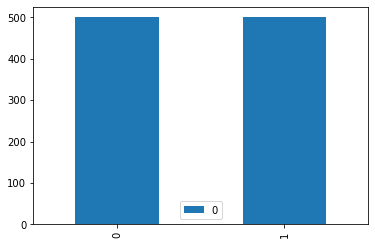

In [3]:
# C. Data Discussion
# Data is 1000 records and based on PCC the act of randomly classifying the result is 50%

from collections import Counter
state_counts = Counter(df_advertising['Clicked on Ad'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [4]:
# D. k_NN Implementations

dummy=df_advertising
df_features=dummy.drop({'Clicked on Ad'}, axis=1)
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,50,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings: 
        from sklearn.neighbors import KNeighborsClassifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

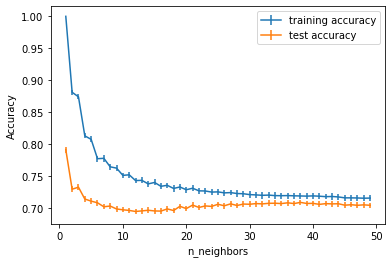

In [5]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [6]:
# 1 neighbor produced best accuracy but is overfitting the model
# Best balance of under and overfitting is 30 neighbors but test accuracy is below the 75% threshold

In [7]:
# Check if logistic regression would provide better results

dummy=df_advertising
df_features=dummy.drop({'Clicked on Ad'}, axis=1)
   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()  # build the model
clf.fit(X_train, y_train)
print("training set score: %f" % clf.score(X_train, y_train))
print("test set score: %f" % clf.score(X_test, y_test))

training set score: 0.901333
test set score: 0.884000


In [8]:
# Logistic regression produced better result
# Now check if logistic regression with L1 penalty ,ie lasso, will improve the results

dummy=df_advertising
df_features=dummy.drop({'Clicked on Ad'}, axis=1)
   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear')  # build the model
clf.fit(X_train, y_train)
print("training set score: %f" % clf.score(X_train, y_train))
print("test set score: %f" % clf.score(X_test, y_test))

training set score: 0.972000
test set score: 0.960000


Weight of the top predictor = 0.156840


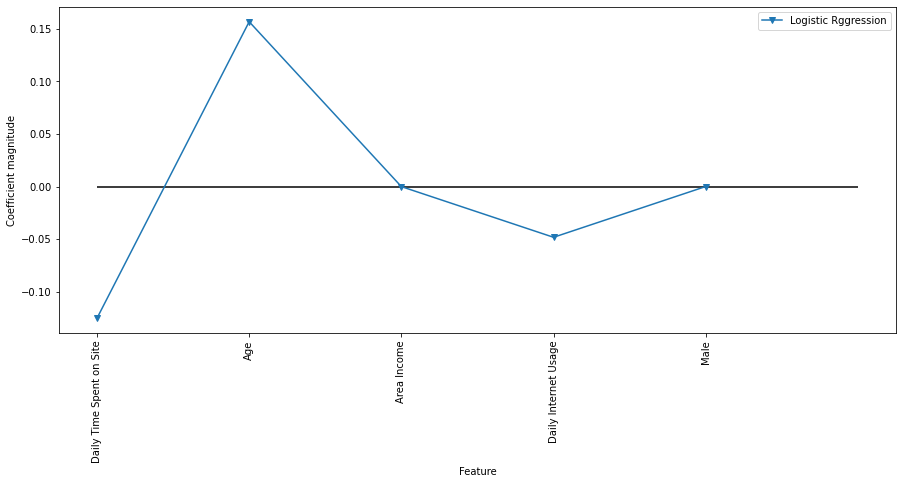

In [9]:
# Logistic regression with l1 produced better results
# now check which features are not needed, ie coefficient almost 0, which is Male
fig = plt.figure(figsize=(15, 6))
plt.plot(clf.coef_.T, '-v', label="Logistic Rggression")

plt.xticks(range(df_features.shape[1]), ["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male"], rotation=90)
plt.hlines(0,0, df_features.shape[1])
#plt.ylim(-20, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()


print("Weight of the top predictor = %f" %np.amax(np.abs(clf.coef_.T))) #Determine which among the coefficients has the highest value



In [10]:
# Now run KNN but remove 'Area Income' and 'Male' in the features

dummy=df_advertising
df_features=dummy.drop({'Area Income','Male','Clicked on Ad'}, axis=1)
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,50,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings: 
        from sklearn.neighbors import KNeighborsClassifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

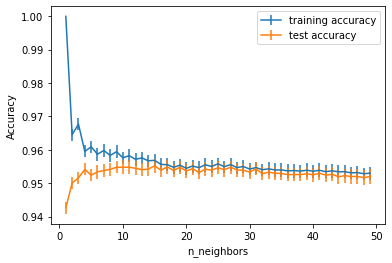

In [11]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [12]:
# E. Discussion of results
# Removing 'Area Income' & 'Male' features cleared the 75% threshhold. 
# The optimal n neighbors is between 15-21 with test accuracy of almost 96%
# This is better than the original model which had optimal n neighbors of >30
# The reduction in n neighbors would also speed up processing time as KNN run time  is n_neighbors^2
# Using the Lasso regression feature reduction method allowed us to highlight the features that created noise in the model and remove them.

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn #library provided by amueller
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.2g}'.format

# Logistic Regression
### L2 Reg

In [16]:
#Get Data 
dummy=df_advertising
df_features=dummy.drop({'Clicked on Ad'}, axis=1)

#Separate Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)

#Fit using Logistic Regression with C=10
logisticregression = LogisticRegression(C=10000, max_iter=10000).fit(X_train, y_train) 
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.901333
test set score: 0.884000


In [40]:
logisticregression0 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
logisticregression100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
logisticregression10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
logisticregression1 = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
logisticregression01 = LogisticRegression(C=.01, max_iter=10000).fit(X_train, y_train)
logisticregression001 = LogisticRegression(C=.001, max_iter=10000).fit(X_train, y_train)
logisticregression002 = LogisticRegression(C=.002, max_iter=10000).fit(X_train, y_train)

#print("C =10, training set score: %f" % logisticregression10.score(X_train, y_train))
print("C =0.0, train set score: %f" % logisticregression0.score(X_train, y_train))
print("C =0.0, test set score: %f \n" % logisticregression0.score(X_test, y_test))

print("C =.001, train set score: %f" % logisticregression001.score(X_train, y_train))
print("C =.001, test set score: %f \n" % logisticregression001.score(X_test, y_test))

print("C =.002, train set score: %f" % logisticregression002.score(X_train, y_train))
print("C =.002, test set score: %f \n" % logisticregression002.score(X_test, y_test))

print("C =.01, train set score: %f" % logisticregression01.score(X_train, y_train))
print("C =.01, test set score: %f \n" % logisticregression01.score(X_test, y_test))

print("C =1, train set score: %f" % logisticregression1.score(X_train, y_train))
print("C =1, test set score: %f \n" % logisticregression1.score(X_test, y_test))

print("C =10, train set score: %f" % logisticregression10.score(X_train, y_train))
print("C =10, test set score: %f \n" % logisticregression10.score(X_test, y_test))

print("C =100, train set score: %f" % logisticregression100.score(X_train, y_train))
print("C =100, test set score: %f" % logisticregression100.score(X_test, y_test))

C =0.0, train set score: 0.969333
C =0.0, test set score: 0.968000 

C =.001, train set score: 0.900000
C =.001, test set score: 0.888000 

C =.002, train set score: 0.902667
C =.002, test set score: 0.888000 

C =.01, train set score: 0.906667
C =.01, test set score: 0.884000 

C =1, train set score: 0.969333
C =1, test set score: 0.968000 

C =10, train set score: 0.961333
C =10, test set score: 0.932000 

C =100, train set score: 0.961333
C =100, test set score: 0.932000


In [45]:
logisticregression0 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % logisticregression0.score(X_train, y_train))
print("test set score: %f" % logisticregression0.score(X_test, y_test))

training set score: 0.969333
test set score: 0.968000


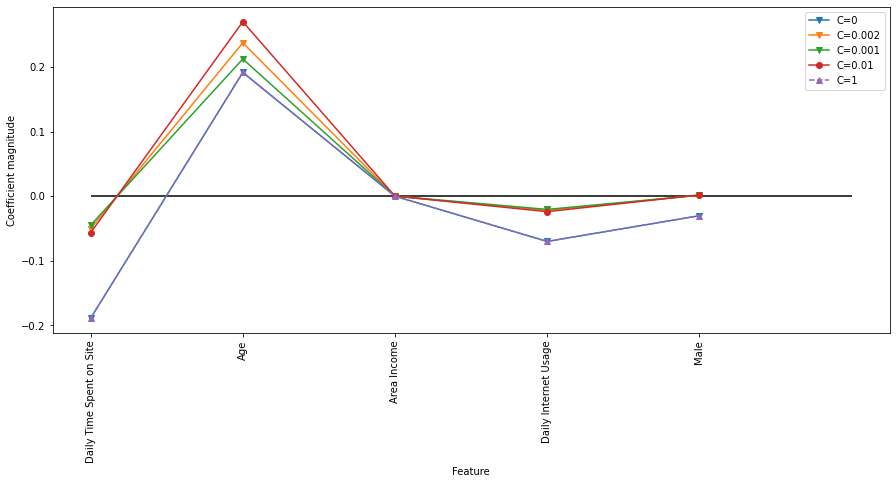

In [47]:
fig = plt.figure(figsize=(15, 6))
plt.plot(logisticregression0.coef_.T, '-v', label="C=0")
plt.plot(logisticregression002.coef_.T, '-v', label="C=0.002")
plt.plot(logisticregression001.coef_.T, '-v', label="C=0.001")
plt.plot(logisticregression01.coef_.T, '-o', label="C=0.01")
plt.plot(logisticregression1.coef_.T, '--^', label="C=1")
#plt.plot(logisticregression10.coef_.T, '--*', label="C=10")
#plt.plot(logisticregression100.coef_.T, '-v', label="C=100")
plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
plt.hlines(0,0, df_features.shape[1])
#plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [48]:
print("Weight of the top predictor = %f" %np.amax(logisticregression001.coef_.T))
print("Top Predictor = %s" %df_features.columns[np.argmax(logisticregression001.coef_.T)])

Weight of the top predictor = 0.212270
Top Predictor = Age


In [49]:
No_trials = 20

all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8,1e-5, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300]

    for alpha_run in C:
        lr_l2 = LogisticRegression(C=alpha_run).fit(X_train, y_train)
        training_accuracy.append(lr_l2.score(X_train, y_train))
        test_accuracy.append(lr_l2.score(X_test, y_test))
        #print(alpha_run)
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.913263
Best C Parameter = 0.200000


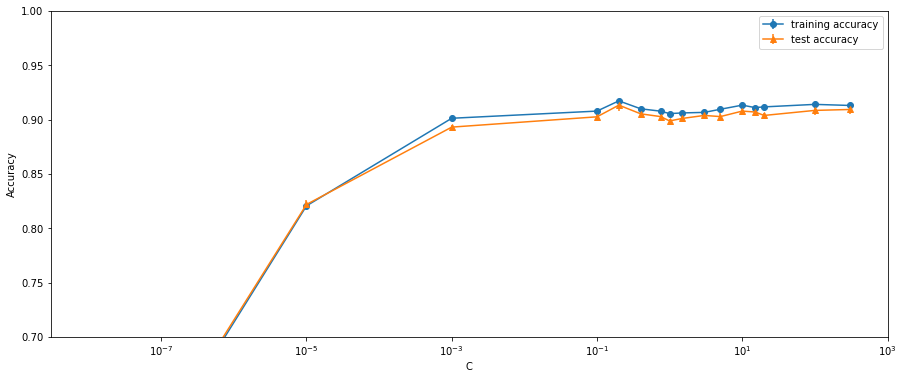

In [50]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, all_training.mean(axis=1),
             yerr=all_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, all_test.mean(axis=1), marker='^',
             yerr=5*all_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(all_test.mean(axis=1))])

In [51]:
lr_l2 = LogisticRegression(C=C[np.argmax(all_test.mean(axis=1))]).fit(X_train, y_train)

print("Top Predictor = %s" %df_features.columns[np.argmax(lr_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l2 .coef_.T))


Top Predictor = Male
Top Predictor Weight of ML with highest prediction = 1.728121


# Logistic Regression
### L1 Reg

train accuracy of L1 logreg with C=0.010000: 0.904000
test accuracy of L1 logreg with C=0.010000: 0.888000 

train accuracy of L1 logreg with C=0.020000: 0.904000
test accuracy of L1 logreg with C=0.020000: 0.888000 

train accuracy of L1 logreg with C=0.100000: 0.934667
test accuracy of L1 logreg with C=0.100000: 0.916000 

train accuracy of L1 logreg with C=1.000000: 0.968000
test accuracy of L1 logreg with C=1.000000: 0.968000 

train accuracy of L1 logreg with C=10.000000: 0.969333
test accuracy of L1 logreg with C=10.000000: 0.968000 



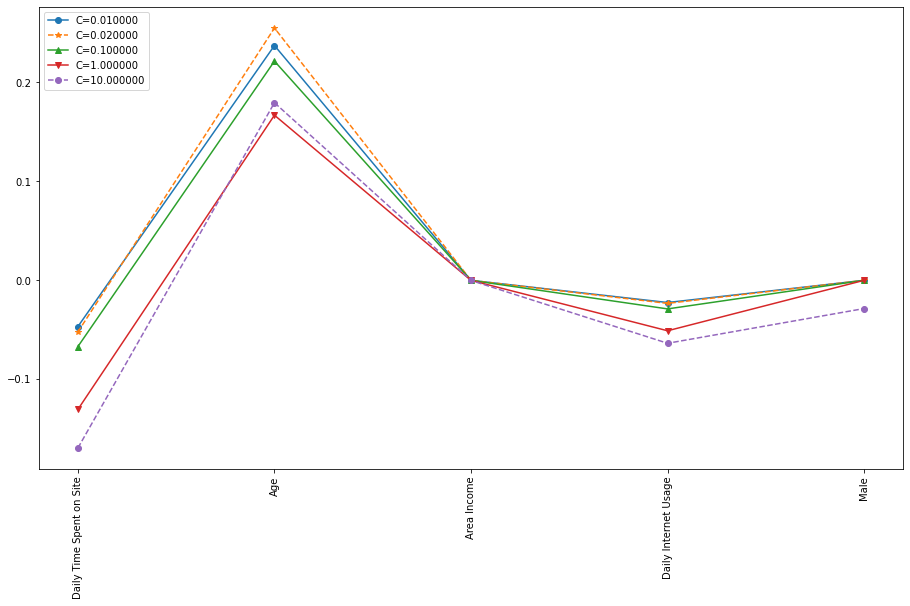

In [59]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.01,0.02,.1, 1,10,20],['-o','--*','-^','-v','--o']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("train accuracy of L1 logreg with C=%f: %f"
    % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f \n"
    % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

In [61]:
logisticregression1 = LogisticRegression(C=1, penalty="l1", solver='liblinear').fit(X_train, y_train)
print("Top Predictor Weight = %f" %np.amax(logisticregression1.coef_.T))
print("Top Predictor = %s" %df_features.columns[np.argmax(logisticregression1.coef_.T)])

Top Predictor Weight = 0.170418
Top Predictor = Age


In [62]:
No_trials = 20

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        
        lr_l1 = LogisticRegression(C=alpha_run, penalty="l1", solver='liblinear').fit(X_train, y_train)
        training_accuracy.append(lr_l1.score(X_train, y_train))
        test_accuracy.append(lr_l1.score(X_test, y_test))
            
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.968211
Best C Parameter = 15.000000


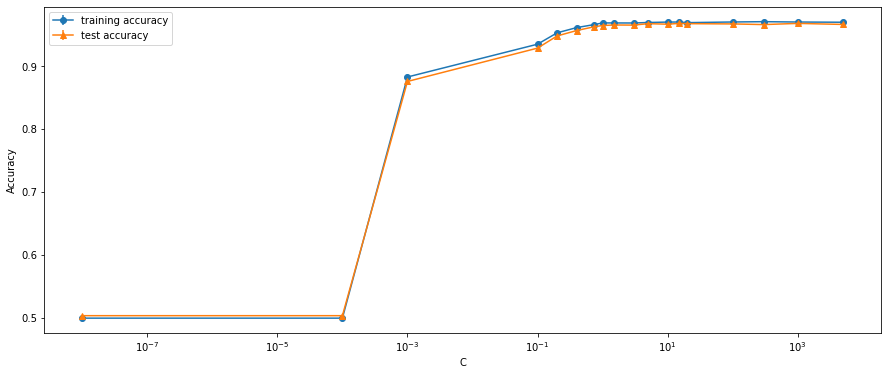

In [63]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.9,1)
plt.legend()
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [64]:
lr_l1 = LogisticRegression(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", solver='liblinear').fit(X_train, y_train)

print("Top Predictor = %s" %df_features.columns[np.argmax(lr_l1.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l1 .coef_.T))

Top Predictor = Age
Top Predictor Weight of ML with highest prediction = 0.166336


# SVM 
## L2
### Full features

In [87]:
No_trials =20

from sklearn.svm import LinearSVC

dummy=df_advertising
df_features=dummy.drop({'Clicked on Ad'}, axis=1)
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
  
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        svm_l2 = LinearSVC(C=alpha_run, penalty="l2").fit(X_train, y_train)
        training_accuracy.append(svm_l2.score(X_train, y_train))
        test_accuracy.append(svm_l2.score(X_test, y_test))
     
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


Highest Test Set Achieved = 0.510526
Best C Parameter = 1.500000


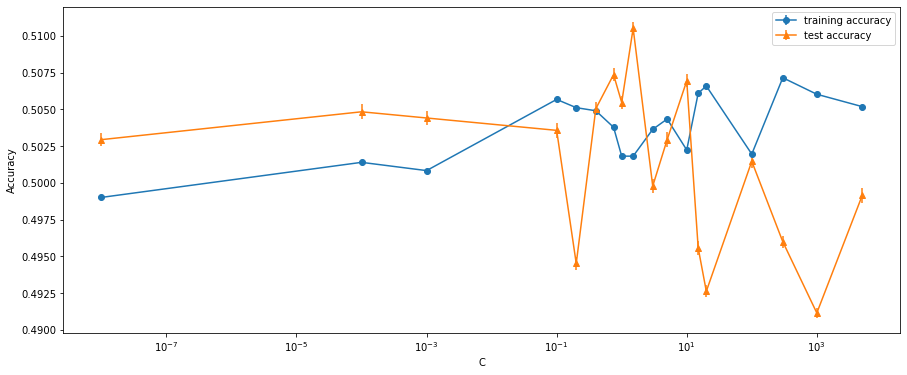

In [88]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [89]:
svm_l2 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l2").fit(X_train, y_train)

print("Top Predictor = %s" %df_features.columns[np.argmax(svm_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l2 .coef_.T))

Top Predictor = Age
Top Predictor Weight of ML with highest prediction = 0.003935


train accuracy of L2 logreg with C=0.000100: 0.502667
test accuracy of L2 logreg with C=0.000100: 0.492000 

train accuracy of L2 logreg with C=0.010000: 0.512000
test accuracy of L2 logreg with C=0.010000: 0.512000 

train accuracy of L2 logreg with C=1.000000: 0.502667
test accuracy of L2 logreg with C=1.000000: 0.492000 

train accuracy of L2 logreg with C=100.000000: 0.502667
test accuracy of L2 logreg with C=100.000000: 0.492000 

Top Predictor Value= 0.003942
Top Predictor = Age


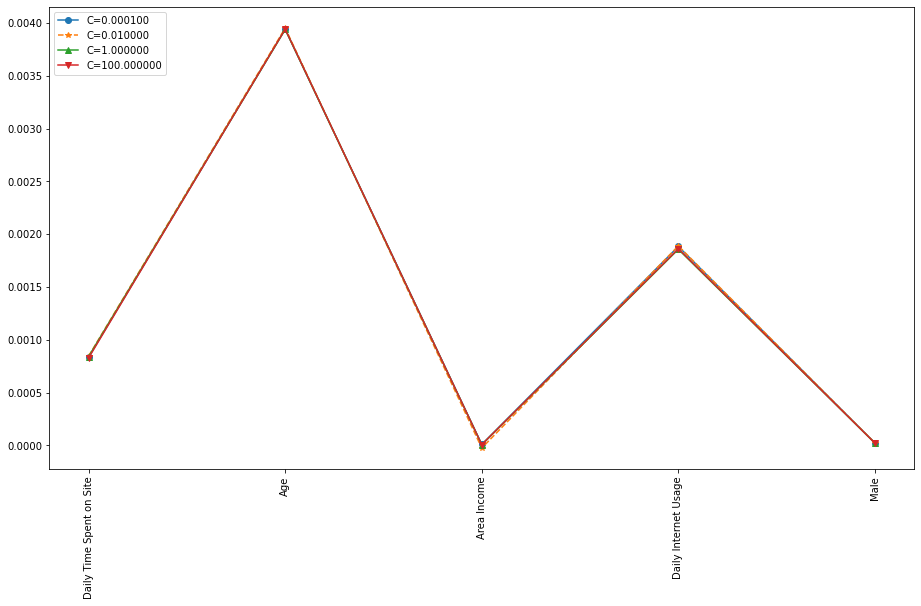

In [90]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.0001,.01, 1, 100],['-o','--*','-^','-v']):
    lsvc_l2 = LinearSVC(C=C, penalty="l2").fit(X_train, y_train)
    print("train accuracy of L2 logreg with C=%f: %f"
    % (C, lsvc_l2.score(X_train, y_train)))
    print("test accuracy of L2 logreg with C=%f: %f \n"
    % (C, lsvc_l2.score(X_test, y_test)))
    plt.plot(lsvc_l2.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l2").fit(X_train, y_train)
print("Top Predictor Value= %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %df_features.columns[np.argmax(linearSVC01.coef_.T)])

# SVM
## L2
### Remove 'Area Income'

In [100]:
No_trials =20

from sklearn.svm import LinearSVC

dummy=df_advertising
df_features=dummy.drop({'Area Income','Clicked on Ad'}, axis=1)
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
  
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        svm_l2 = LinearSVC(C=alpha_run, penalty="l2").fit(X_train, y_train)
        training_accuracy.append(svm_l2.score(X_train, y_train))
        test_accuracy.append(svm_l2.score(X_test, y_test))
     
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


Highest Test Set Achieved = 0.897263
Best C Parameter = 0.001000


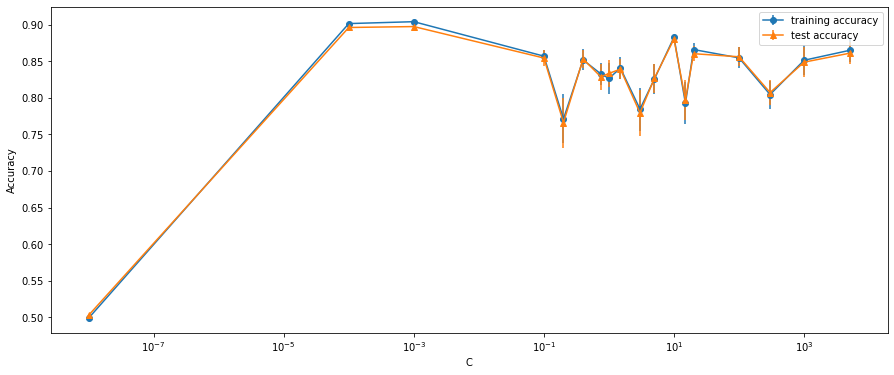

In [101]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [102]:
svm_l2 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l2").fit(X_train, y_train)

print("Top Predictor = %s" %df_features.columns[np.argmax(svm_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l2 .coef_.T))

Top Predictor = Age
Top Predictor Weight of ML with highest prediction = 0.078405


train accuracy of L2 logreg with C=0.000100: 0.900000
test accuracy of L2 logreg with C=0.000100: 0.904000 

train accuracy of L2 logreg with C=0.010000: 0.910667
test accuracy of L2 logreg with C=0.010000: 0.916000 

train accuracy of L2 logreg with C=1.000000: 0.900000
test accuracy of L2 logreg with C=1.000000: 0.896000 

train accuracy of L2 logreg with C=100.000000: 0.690667
test accuracy of L2 logreg with C=100.000000: 0.736000 

Top Predictor Value= 0.075538
Top Predictor = Age


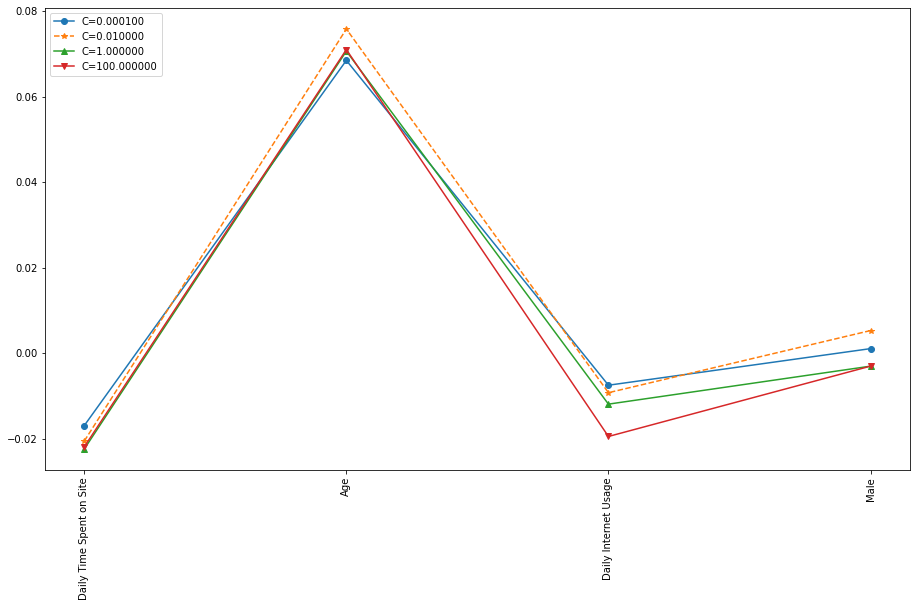

In [103]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.0001,.01, 1, 100],['-o','--*','-^','-v']):
    lsvc_l2 = LinearSVC(C=C, penalty="l2").fit(X_train, y_train)
    print("train accuracy of L2 logreg with C=%f: %f"
    % (C, lsvc_l2.score(X_train, y_train)))
    print("test accuracy of L2 logreg with C=%f: %f \n"
    % (C, lsvc_l2.score(X_test, y_test)))
    plt.plot(lsvc_l2.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l2").fit(X_train, y_train)
print("Top Predictor Value= %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %df_features.columns[np.argmax(linearSVC01.coef_.T)])

# SVM
## L1

In [104]:
No_trials=20

from sklearn.svm import LinearSVC

dummy=df_advertising
df_features=dummy.drop({'Clicked on Ad'}, axis=1)
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_advertising['Clicked on Ad'], 
                                                        test_size=0.25, random_state=seedN)
        
    #X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
    training_accuracy = []
    test_accuracy = []
    #neighbors_settings = range(1, 100) # try n_neighbors from 1 to 50

    C = [1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:

        svm_l1 = LinearSVC(C=alpha_run, penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)
        training_accuracy.append(svm_l1.score(X_train, y_train))
        test_accuracy.append(svm_l1.score(X_test, y_test))

    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.966526
Best C Parameter = 5.000000


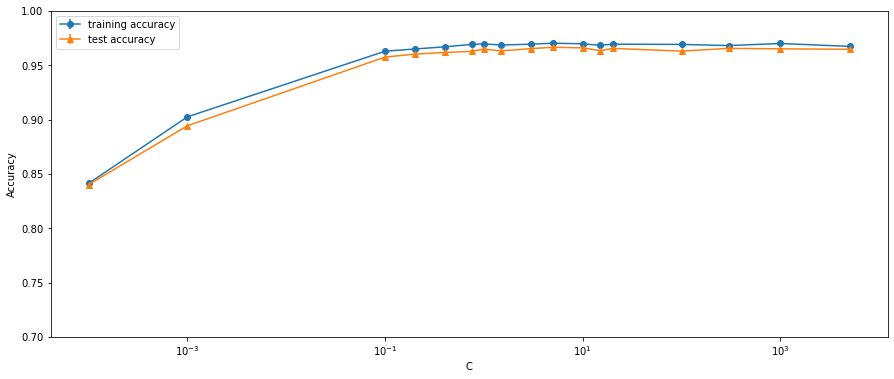

In [105]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [106]:
svm_l1 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)

print("Top Predictor = %s" %df_features.columns[np.argmax(svm_l1.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l1 .coef_.T))


Top Predictor = Age
Top Predictor Weight of ML with highest prediction = 0.044926


training accuracy of L1 logreg with C=0.000010: 0.497333
test accuracy of L1 logreg with C=0.000010: 0.508000 

training accuracy of L1 logreg with C=0.010000: 0.905333
test accuracy of L1 logreg with C=0.010000: 0.888000 

training accuracy of L1 logreg with C=1.000000: 0.969333
test accuracy of L1 logreg with C=1.000000: 0.968000 

training accuracy of L1 logreg with C=10.000000: 0.969333
test accuracy of L1 logreg with C=10.000000: 0.972000 

training accuracy of L1 logreg with C=100.000000: 0.969333
test accuracy of L1 logreg with C=100.000000: 0.968000 

Top Predictor weight = 0.083963
Top Predictor = Age


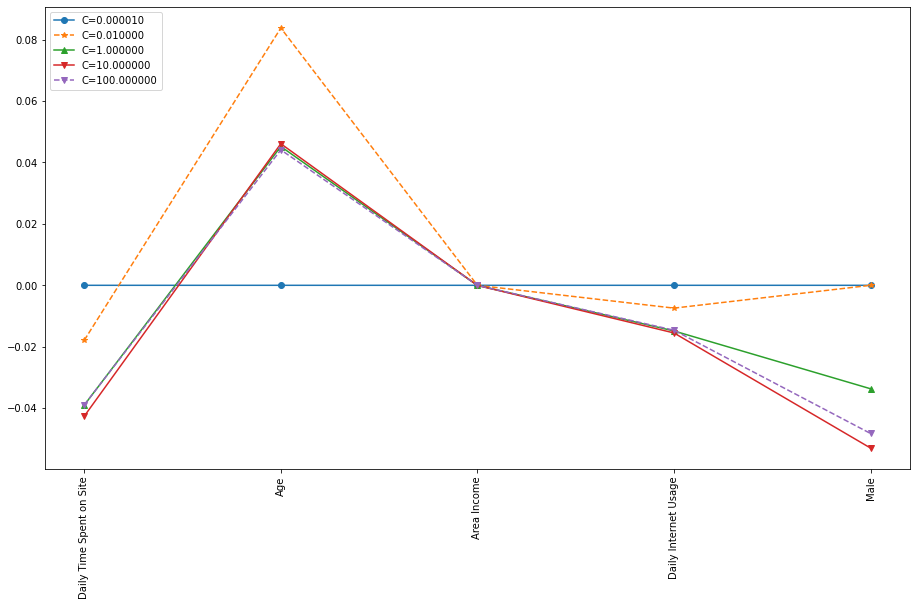

In [107]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.00001,.01, 1, 10, 100],['-o','--*','-^','-v', '--v']):
    lsvc_l1 = LinearSVC(C=C, penalty="l1",loss='squared_hinge', dual=False).fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
    % (C, lsvc_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f \n"
    % (C, lsvc_l1.score(X_test, y_test)))
    plt.plot(lsvc_l1.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
#plt.ylim(-.5, .5)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l1",dual=False).fit(X_train, y_train)
print("Top Predictor weight = %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %df_features.columns[np.argmax(linearSVC01.coef_.T)])


# Results - Comparison

## KNN
Highest Test Set Achieved < 75%

(without removing features)

## Logistic Regression
#### L2
Highest Test Set Achieved = 91%

Best C Parameter = 0.2

#### L1
Highest Test Set Achieved = 97%

Best C Parameter = 15

## SVM
#### L2 - Full features
Highest Test Set Achieved = 51%

Best C Parameter = 1.5

#### L2 - 'Area Income' removed
Highest Test Set Achieved = 90%

Best C Parameter = 0.001

#### L1
Highest Test Set Achieved = 97%

Best C Parameter = 5
